## Target site url

- https://www.gotokyo.org/kr/destinations/index.html

Reference of how to use selenium

https://youtu.be/j7VZsCCnptM

In [13]:
!pip3 install selenium==4.6.0
!pip3 install webdriver-manager==3.8.5
!pip3 install diagrams==0.23.1

graphviz for Windows
https://graphviz.org/download/

In [15]:
!brew install graphviz

Running `brew update --auto-update`...
==> Auto-updated Homebrew!
Updated 4 taps (heroku/brew, homebrew/cask-versions, homebrew/core and homebrew/cask).
==> New Formulae
bindgen             hysteria            mariadb@10.8        vhs
btrfs-progs         kustomizer          python-lsp-server   waybackpy
cdsclient           libemf2svg          rnr                 xcodes
cmctl               libunibreak         ruff
cntb                license-eye         tart
corrosion           llama               typos-cli
==> New Casks
ankerslicer                neat                       slab
cad-assistant              opensoundmeter             thangs-sync
element-nightly            protonmail-import-export   unite-phone
faxbot                     quiet-reader               vmware-fusion12
gimp-dev                   rapidapi
icon-shelf                 restfox

You have 30 outdated formulae installed.
You can upgrade them with brew upgrade
or list them with brew outdated.

==> Downloading https://ghcr

==> Installing graphviz dependency: gd
==> Pouring gd--2.3.3_4.ventura.bottle.tar.gz
🍺  /usr/local/Cellar/gd/2.3.3_4: 33 files, 1.3MB
==> Installing graphviz dependency: netpbm
==> Pouring netpbm--10.86.35.ventura.bottle.tar.gz
🍺  /usr/local/Cellar/netpbm/10.86.35: 408 files, 12.8MB
==> Installing graphviz dependency: gts
==> Pouring gts--0.7.6_2.ventura.bottle.tar.gz
🍺  /usr/local/Cellar/gts/0.7.6_2: 25 files, 1.3MB
==> Installing graphviz dependency: libx11
==> Pouring libx11--1.8.2.ventura.bottle.tar.gz
🍺  /usr/local/Cellar/libx11/1.8.2: 1,054 files, 7.0MB
==> Installing graphviz dependency: gdk-pixbuf
==> Pouring gdk-pixbuf--2.42.10.ventura.bottle.tar.gz
==> /usr/local/Cellar/gdk-pixbuf/2.42.10/bin/gdk-pixbuf-query-loaders --update-c
🍺  /usr/local/Cellar/gdk-pixbuf/2.42.10: 148 files, 3.6MB
==> Installing graphviz dependency: pango
==> Pouring pango--1.50.12.ventura.bottle.tar.gz
🍺  /usr/local/Cellar/pango/1.50.12: 68 files, 3.1MB
==> Installing graphviz dependency: librsvg
==> Pou

In [19]:
from selenium import webdriver
from selenium.webdriver.common.by import By

from webdriver_manager.chrome import ChromeDriverManager
from webdriver_manager.core.utils import ChromeType
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service

import os

from IPython import display
from IPython.display import Image
from base64 import b64decode

chrome_service = Service(ChromeDriverManager().install())

In [3]:
# Get environment variables
IS_GITHUB_ACTION = os.getenv('IS_GITHUB_ACTION')

In [4]:
chrome_options = Options()
if IS_GITHUB_ACTION:
    options = [
        "--headless",
        "--disable-gpu",
        "--window-size=1920,1080",
        "--ignore-certificate-errors",
        "--disable-extensions",
        "--no-sandbox",
        "--disable-dev-shm-usage"
    ]
    user_agent = 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.50 Safari/537.36'    
    chrome_options.add_argument('user-agent={0}'.format(user_agent))
    for option in options:
        chrome_options.add_argument(option)

In [8]:
# browser = webdriver.Chrome(f'{my_dir[0]}/chromedriver')    
browser = webdriver.Chrome(service=chrome_service, options=chrome_options)
browser.set_window_size(1920, 1080)
browser.get('https://www.gotokyo.org/kr/destinations/index.html')
# browser.get('https://www.skyscanner.co.kr/travel-restrictions/%EB%8C%80%EB%A7%8C/29475323?origin=29475329#MapContainer')

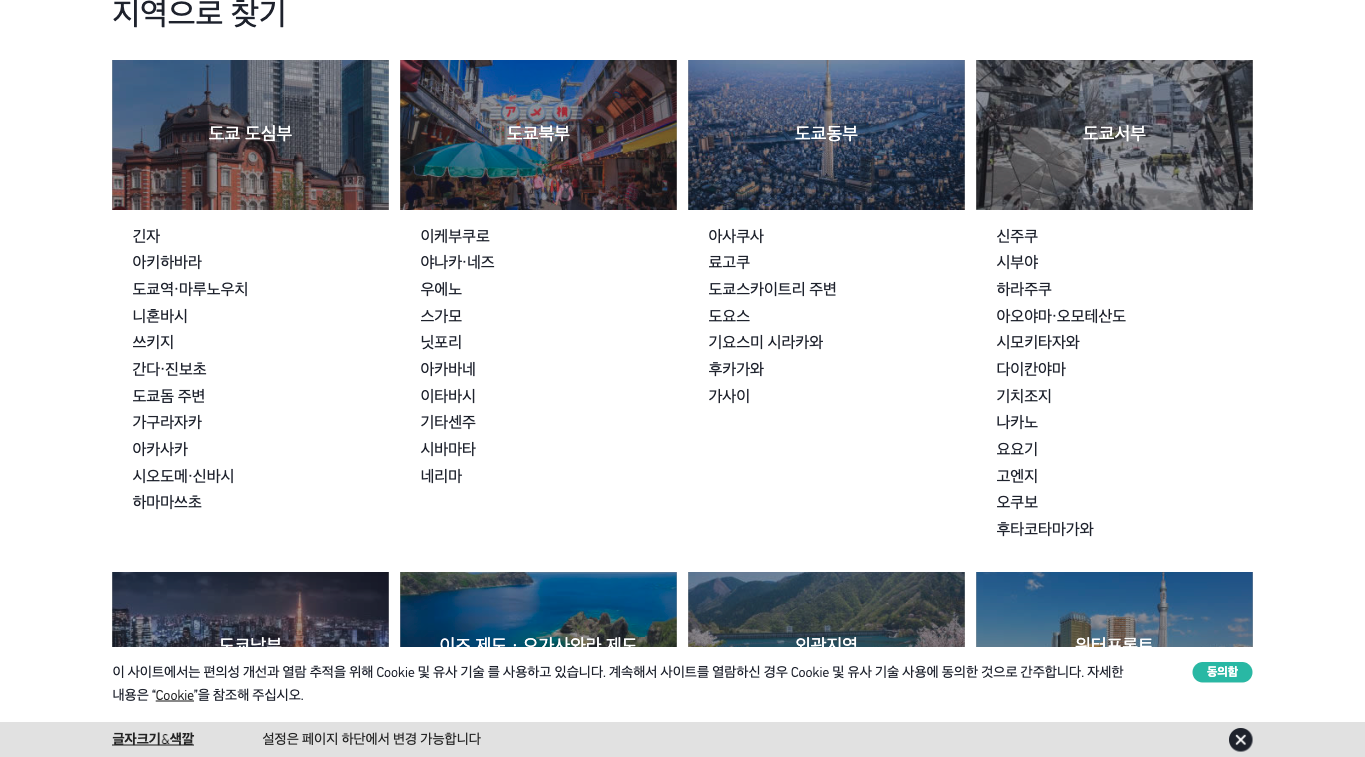

In [11]:
display.Image(b64decode(browser.find_element(By.CSS_SELECTOR, '#tmp_explore_tokyo').screenshot_as_base64))

## This crawling page goal

- Crawling multi pages using multi-processing and Queue to increase crawling speed

Diagrams examples

- https://diagrams.mingrammer.com/docs/guides/diagram

In [65]:
from diagrams import Diagram, Cluster, Edge
from diagrams.onprem.vcs import Github
from diagrams.programming.flowchart import StartEnd, Preparation, Action, MultipleDocuments, Decision

with Diagram("Crawling flow diagram", show=False, filename="crawling_flow", direction="TB"):
    start = StartEnd("start")
    pre_run_selenium = Preparation("Run selenium chrome driver")
    go_site = Action("Go to crawling target site")
    
    start >> pre_run_selenium
    pre_run_selenium >> go_site
    
    with Cluster('Crawling multiple sites (Multi processing)', direction='LR'):
        crawling_sites = [Action("site 1"), Action("site 2"), Action("site 3")]
    
    go_site >> crawling_sites
    
    insert_to_queue = Action("Insert crawling results to queue")
    
    crawling_sites >> insert_to_queue
    
    is_queue_end = Decision("Is queue empty")
    
    insert_to_queue >> is_queue_end
    
    pop_queue = Action("Get from queue")
    
    data = MultipleDocuments("Crawling result data")
    
    is_queue_end >> Edge(label="Not empty") >>  pop_queue >> is_queue_end
    
    is_queue_end >> Edge(label="Empty") >> data >> Github("Hosting data via github pages")
    


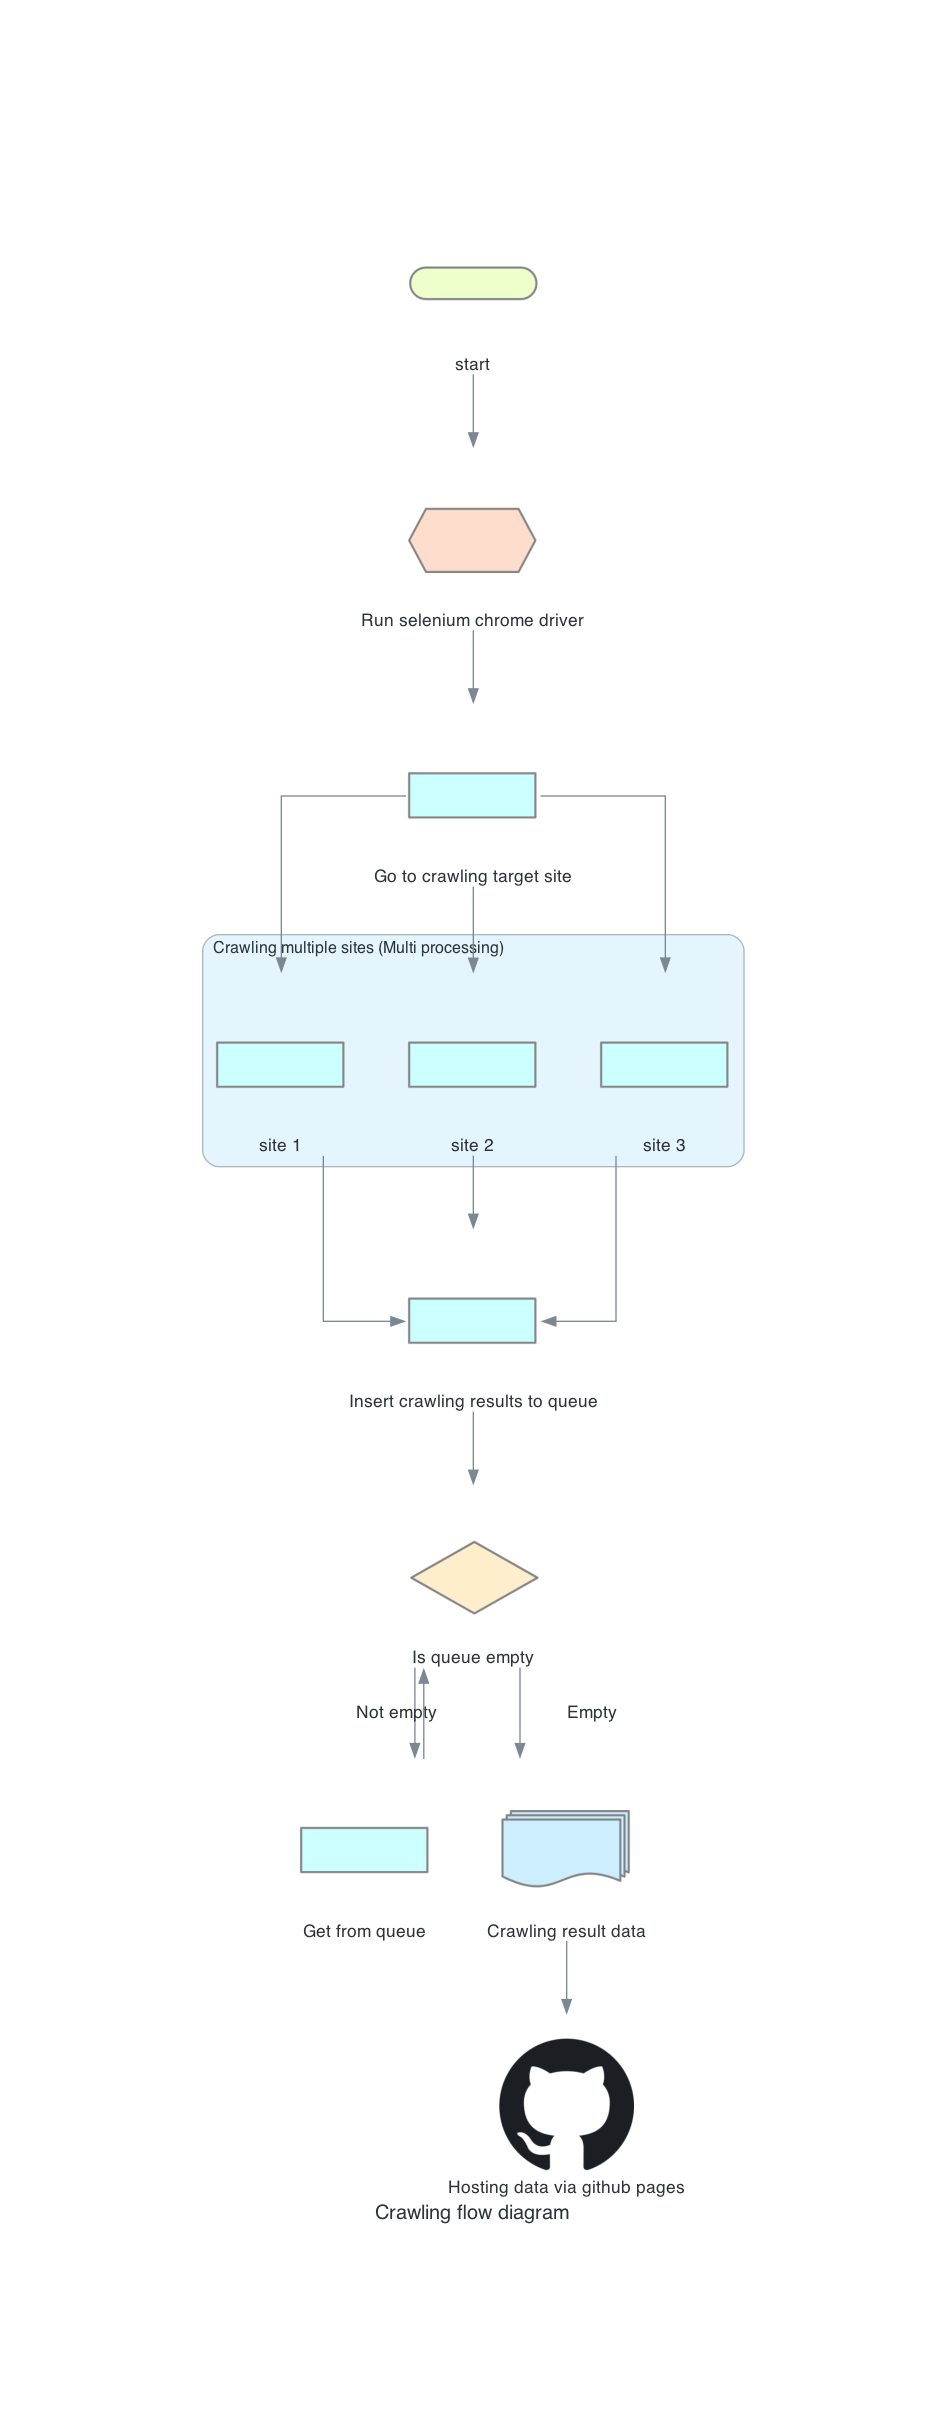

In [66]:
Image(filename='./crawling_flow.png', width="600px") 

In [64]:
browser.close()

InvalidSessionIdException: Message: invalid session id
Stacktrace:
0   chromedriver                        0x00000001065472c8 chromedriver + 4752072
1   chromedriver                        0x00000001064c7463 chromedriver + 4228195
2   chromedriver                        0x000000010612a98a chromedriver + 440714
3   chromedriver                        0x0000000106159277 chromedriver + 631415
4   chromedriver                        0x0000000106188c0c chromedriver + 826380
5   chromedriver                        0x000000010618562a chromedriver + 812586
6   chromedriver                        0x0000000106184d70 chromedriver + 810352
7   chromedriver                        0x00000001060fd6ca chromedriver + 255690
8   chromedriver                        0x000000010651430e chromedriver + 4543246
9   chromedriver                        0x0000000106518a88 chromedriver + 4561544
10  chromedriver                        0x00000001065206df chromedriver + 4593375
11  chromedriver                        0x00000001065198fa chromedriver + 4565242
12  chromedriver                        0x00000001064ef2cf chromedriver + 4391631
13  chromedriver                        0x00000001060fc486 chromedriver + 251014
14  dyld                                0x00007ff809066310 start + 2432
